In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("LRC.data", sep=',')
df.head(10)

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [3]:
x = df.iloc[:, 1:17]
y = df.iloc[:, 0]
x,y

(       2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
 0      5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
 1      4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
 2      7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
 3      2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
 4      4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
 ...   ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
 19994  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
 19995  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
 19996  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
 19997  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
 19998  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8
 
 [19999 rows x 16 columns],
 0        I
 1        D
 2        N
 3        G
 4        S
         ..
 19994    D
 19995    C
 19996    

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state = 143)
slr = StandardScaler()
slr.fit(xtrain)
xtest = slr.transform(xtest)
xtrain = slr.transform(xtrain)


In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(250,300), activation="logistic", max_iter=100000)

In [6]:
mlp.fit(xtrain,ytrain.values.ravel())

MLPClassifier(activation='logistic', hidden_layer_sizes=(250, 300),
              max_iter=100000)

In [7]:
ypred = mlp.predict(xtest)
print("accuracy : ", accuracy_score(ytest, ypred))

accuracy :  0.9653333333333334


In [8]:
cm = confusion_matrix(ytest, ypred)

[]

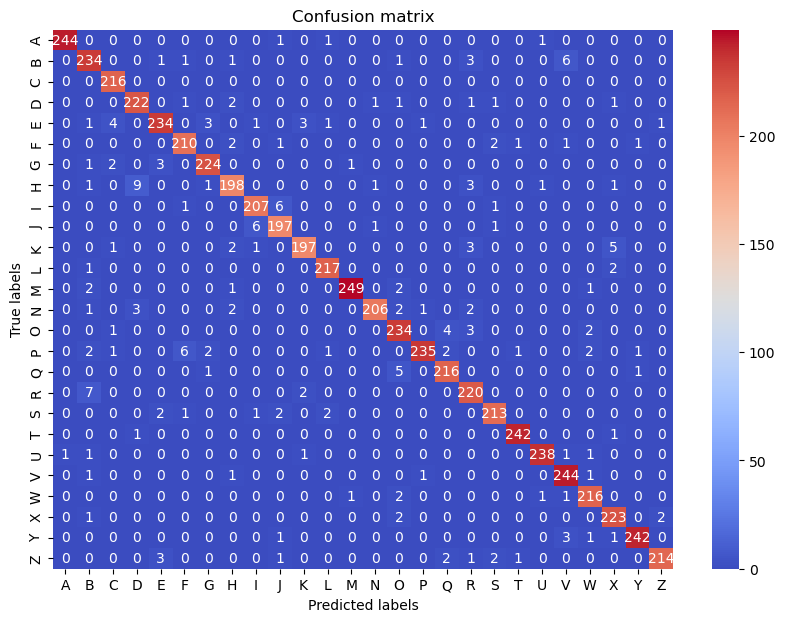

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d",cmap="coolwarm", xticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"), yticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.plot()